In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from scipy.signal import savgol_filter

import matplotlib.ticker

In [2]:
plt.style.use( ['science', 'no-latex'])

# Functions

In [343]:
def plot_magnitude_spectrum_Filtered(signal, sr, f_ratio=1, colour='b'):
    
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft) 
    #magnitude_spectrum = savgol_filter(magnitude_spectrum, 2001, 4)
    magnitude_spectrum = librosa.util.normalize(magnitude_spectrum)
    magnitude_spectrum = 20*np.log10(magnitude_spectrum)
    
    
    
    #plot mag spectrum
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.grid(True, which="both", ls="-")
    
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    no_freq_bins = int(len(frequency)*f_ratio)
    
    ax.set_xscale('log')
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum[:no_freq_bins], color=colour, linewidth=2)
 
    
    ax.set_xticks([100, 1000, 10000])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(50, 20000)
    plt.ylim(-10, )
    ax.set_axisbelow(True)
    
    plt.show()

In [360]:
def plot_magnitude_spectrum_two_filtered(signal1, signal2, sr, f_ratio=1, xlim=20000):
    
    ft1 = np.fft.fft(signal1)
    magnitude_spectrum1 = np.abs(ft1)
    magnitude_spectrum1 = savgol_filter(magnitude_spectrum1, 2001, 3)
    magnitude_spectrum1 = librosa.util.normalize(magnitude_spectrum1)
    magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
    
    
    ft2 = np.fft.fft(signal2)
    magnitude_spectrum2 = np.abs(ft2)
    magnitude_spectrum2 = savgol_filter(magnitude_spectrum2, 2001, 3)
    magnitude_spectrum2 = librosa.util.normalize(magnitude_spectrum2)
    magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)
   
    
    magnitude_spectrum2_plus30 = [x*1.3 for x in magnitude_spectrum2]
    magnitude_spectrum2_minus30 = [x*0.7 for x in magnitude_spectrum2]
    
    #plot mag spectrum
    plt.rcParams.update({'font.size': 18})
    
    fig, ax = plt.subplots(figsize=(18, 10))
    plt.grid(True, which="both", ls="-")
    
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum1))
    no_freq_bins = int(len(frequency)*f_ratio)
    
   
    
    ax.set_xscale('log')
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum1[:no_freq_bins], color='r', label="JFET")
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum2[:no_freq_bins], color='b', label="Vox")
    
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum2_plus30[:no_freq_bins],"--", color='lightseagreen', label="Vox +-30%")
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum2_minus30[:no_freq_bins],"--", color='lightseagreen')
 
    plt.legend(fontsize=20)
    ax.set_xticks([100, 1000, 10000])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.ylabel("Normalised Amplitude (dB)")
    plt.xlabel('Frequency (Hz)')

    plt.xlim(50, xlim)
    #plt.ylim(-75, )
    ax.set_axisbelow(True)
    
    plt.show()

In [355]:
def plot_magnitude_spectrum_one(signal1, sr, f_ratio=1):
    
    ft1 = np.fft.fft(signal1)
    magnitude_spectrum1 = np.abs(ft1)
    magnitude_spectrum1 = savgol_filter(magnitude_spectrum1, 2001, 3)
    magnitude_spectrum1 = librosa.util.normalize(magnitude_spectrum1)
    magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
    
    
#     ft2 = np.fft.fft(signal2)
#     magnitude_spectrum2 = np.abs(ft2)
#     magnitude_spectrum2 = savgol_filter(magnitude_spectrum2, 2001, 3)
#     magnitude_spectrum2 = librosa.util.normalize(magnitude_spectrum2)
#     magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)
   
    
#     magnitude_spectrum2_plus30 = [x*1.3 for x in magnitude_spectrum2]
#     magnitude_spectrum2_minus30 = [x*0.7 for x in magnitude_spectrum2]
    
    #plot mag spectrum
    plt.rcParams.update({'font.size': 27})
    
    fig, ax = plt.subplots(figsize=(18, 10))
    plt.grid(True, which="both", ls="-")
    
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum1))
    no_freq_bins = int(len(frequency)*f_ratio)
    
   
    
    ax.set_xscale('log')
    ax.plot(frequency[:no_freq_bins], magnitude_spectrum1[:no_freq_bins], color='b', linewidth=2)# label="JFET")
    #ax.plot(frequency[:no_freq_bins], magnitude_spectrum2[:no_freq_bins], color='b')# label="Vox")
    
#     ax.plot(frequency[:no_freq_bins], magnitude_spectrum2_plus30[:no_freq_bins],"--", color='lightseagreen', label="Vox +-30%")
#     ax.plot(frequency[:no_freq_bins], magnitude_spectrum2_minus30[:no_freq_bins],"--", color='lightseagreen')
 
    plt.legend(fontsize=20)
    ax.set_xticks([100, 1000, 10000])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.ylabel("Normalised Amplitude (dB)")
    plt.xlabel('Frequency (Hz)')

    plt.xlim(50, 20000)
    plt.ylim(-4, 1)
    ax.set_axisbelow(True)
    
    plt.show()

# Load Audio

In [6]:
VOX_Mid_TCoff, sr = librosa.load("Renders/Chirps/AllMid_TCoff/VOX_Mid_TCoff.wav", sr=48000)

VOX_Bass3oclk, _ = librosa.load("Renders/Chirps/Bass/Vox_Bass3oclk.wav", sr=48000)
VOX_Bass9oclk, _ = librosa.load("Renders/Chirps/Bass/Vox_Bass9oclk.wav", sr=48000)



In [7]:
VOX_Treb3oclk, _ = librosa.load("Renders/Chirps/Treb/Vox_Treb3oclk.wav", sr=48000)
VOX_Treb9oclk, _ = librosa.load("Renders/Chirps/Treb/Vox_Treb9oclk.wav", sr=48000)


In [8]:
JFET_Mid_TCoff, _ = librosa.load("Renders/Chirps/AllMid_TCoff/JFET_Mid_TCoff.wav", sr=48000)

JFET_Bass3oclk, _ = librosa.load("Renders/Chirps/Bass/JFET_Bass3oclk.wav", sr=48000)
JFET_Bass9oclk, _ = librosa.load("Renders/Chirps/Bass/JFET_Bass9oclk.wav", sr=48000)

In [9]:
JFET_Treb3oclk, _ = librosa.load("Renders/Chirps/Treb/JFET_Treb3oclk.wav", sr=48000)
JFET_Treb9oclk, _ = librosa.load("Renders/Chirps/Treb/JFET_Treb9oclk.wav", sr=48000)

In [352]:
ReampChirp, _ = librosa.load("Renders/Reamp_Chirp.wav", sr=48000)
ReampChirp100k, _ = librosa.load("Renders/Reamp_Chirp_100k.wav", sr=48000)

# Plots

In [1]:
#plot_magnitude_spectrum_Filtered(JFET_Mid_TCoff, sr=sr, colour='r')

<ipython-input-360-6e9c588e982d>:7: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


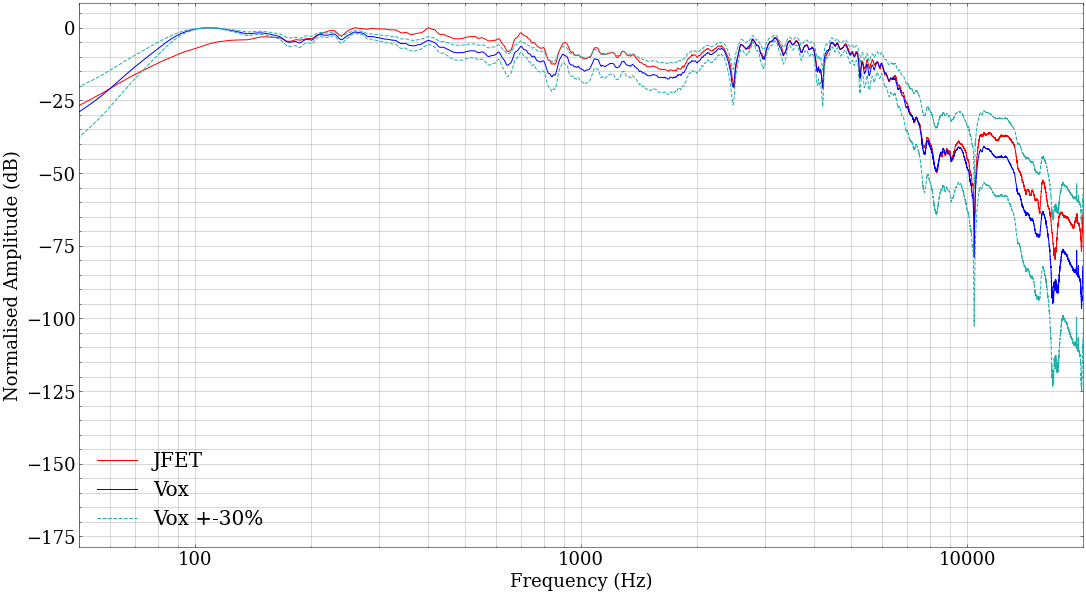

In [361]:
plot_magnitude_spectrum_two_filtered(JFET_Mid_TCoff, VOX_Mid_TCoff, sr=sr, f_ratio=0.5)

In [375]:
Spec_diff(VOX_Mid_TCoff, VOX_Mid_TCoff)

<ipython-input-374-14ae6a4558e8>:6: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[-8.63, -2.75, 2.98, 8.24]

<ipython-input-360-6e9c588e982d>:7: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


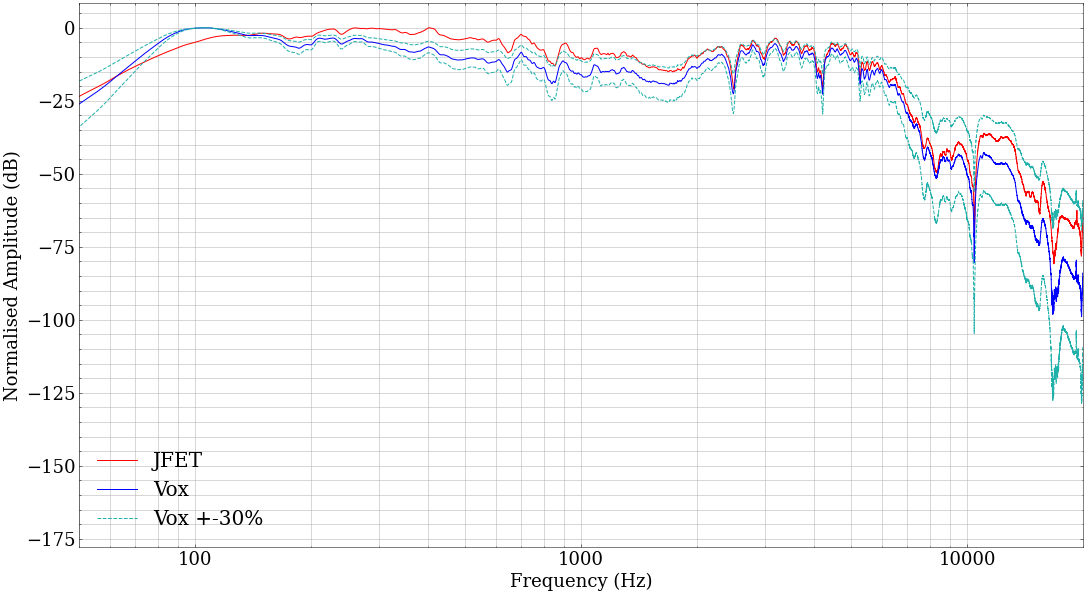

In [363]:
plot_magnitude_spectrum_two_filtered(JFET_Bass3oclk, VOX_Bass3oclk, sr=sr, f_ratio=0.5)

In [376]:
Spec_diff(JFET_Bass3oclk, VOX_Bass3oclk)

<ipython-input-374-14ae6a4558e8>:6: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[-8.45, -0.58, 5.0, 10.31]

<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


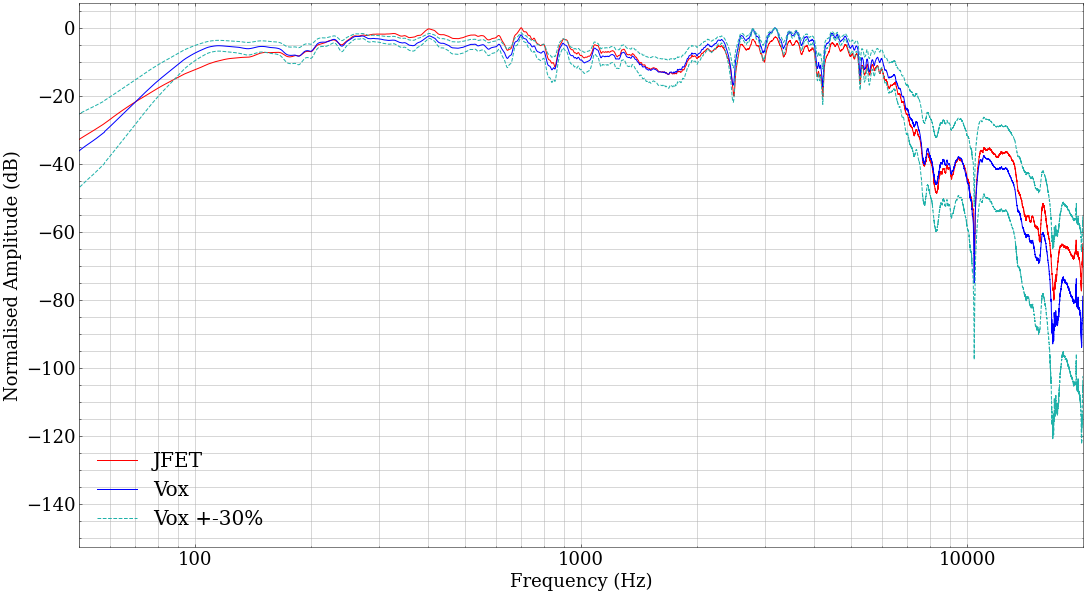

In [365]:
plot_magnitude_spectrum_two_filtered(JFET_Bass9oclk, VOX_Bass9oclk, sr=sr, f_ratio=0.5)

In [377]:
Spec_diff(JFET_Bass9oclk, VOX_Bass9oclk)

<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[-3.76, -5.42, -0.9, 5.04]

<ipython-input-360-6e9c588e982d>:7: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


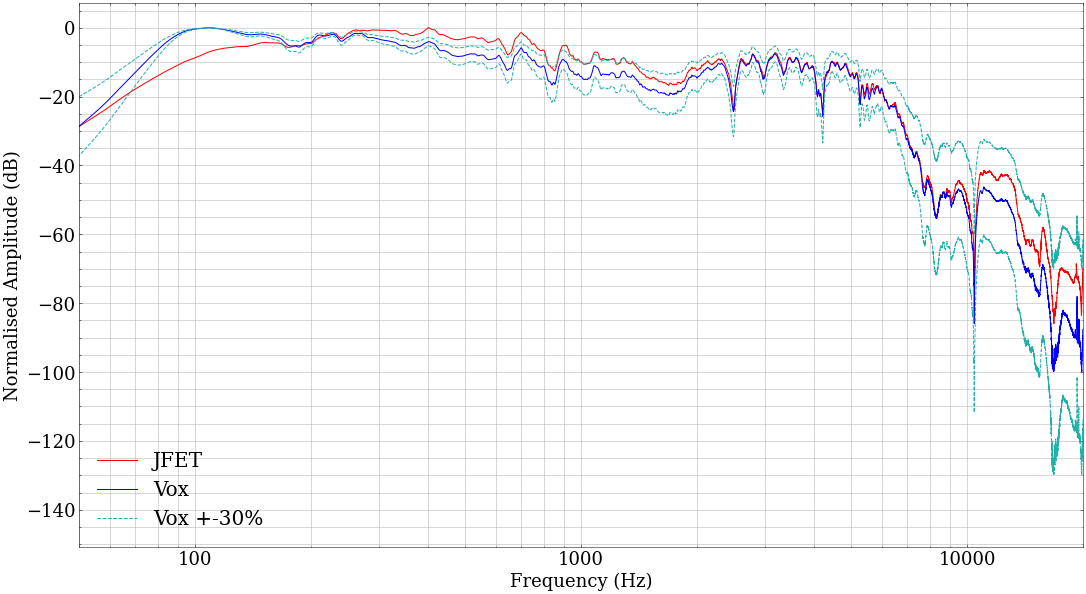

In [367]:
plot_magnitude_spectrum_two_filtered(JFET_Treb9oclk, VOX_Treb9oclk, sr=sr, f_ratio=0.5)

In [378]:
Spec_diff(JFET_Treb9oclk, VOX_Treb9oclk)

<ipython-input-374-14ae6a4558e8>:6: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[-8.75, -3.06, 5.48, 13.59]

<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


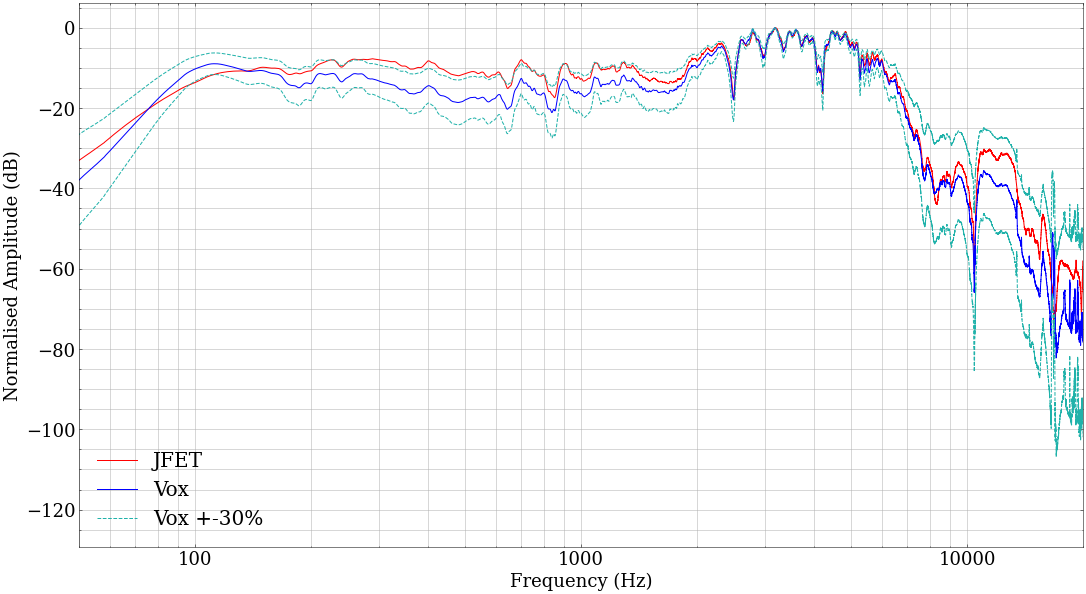

In [369]:
plot_magnitude_spectrum_two_filtered(JFET_Treb3oclk, VOX_Treb3oclk, sr=sr, f_ratio=0.5)

In [379]:
Spec_diff(JFET_Treb3oclk, VOX_Treb3oclk)

<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[0.77, 5.22, 1.48, 3.46]

<ipython-input-360-6e9c588e982d>:7: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-360-6e9c588e982d>:14: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


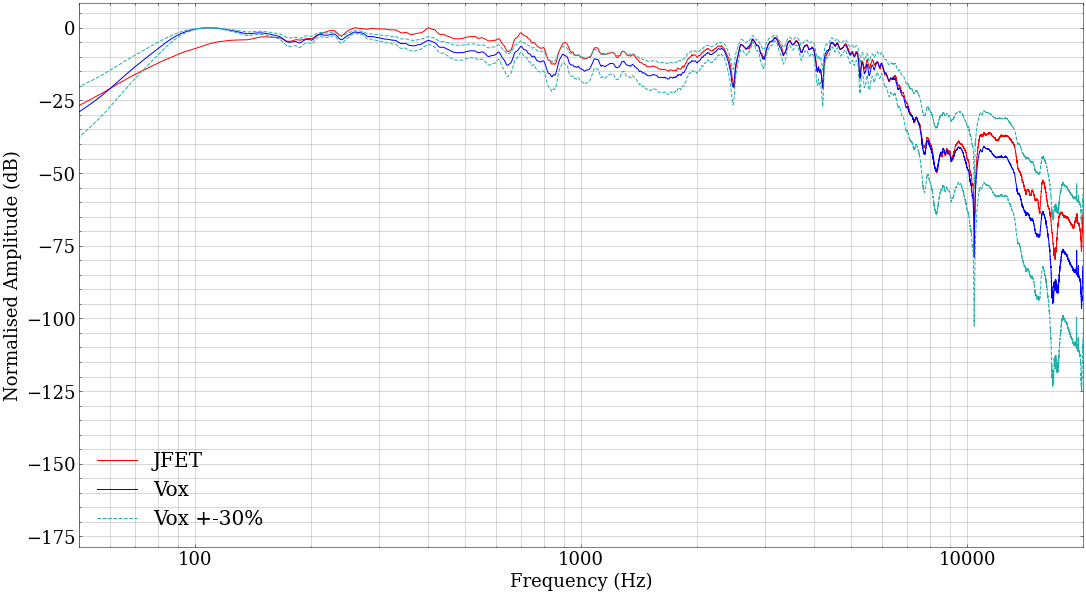

In [371]:
plot_magnitude_spectrum_two_filtered(JFET_Mid_TCoff, VOX_Mid_TCoff, sr=sr, f_ratio=0.5)

In [380]:
Spec_diff(JFET_Mid_TCoff, VOX_Mid_TCoff)

<ipython-input-374-14ae6a4558e8>:6: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
<ipython-input-374-14ae6a4558e8>:13: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


[-8.63, -2.75, 2.98, 8.24]

<ipython-input-355-d50e5c008db7>:7: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
No handles with labels found to put in legend.


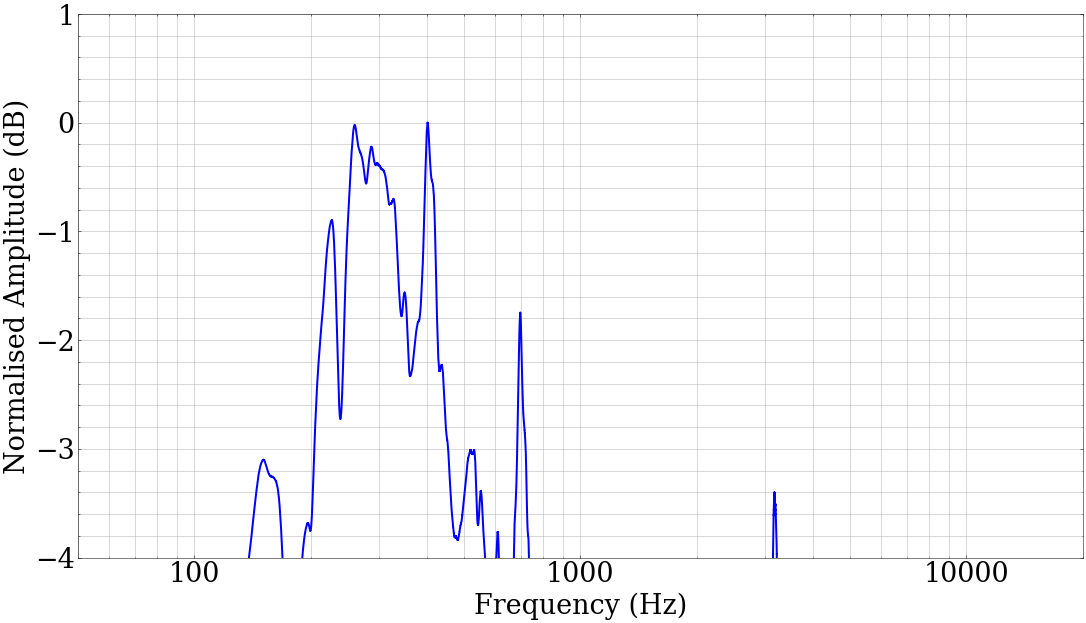

In [373]:
plot_magnitude_spectrum_one(JFET_Mid_TCoff, sr=sr, f_ratio=0.5)

# Difference

In [245]:
ft = np.fft.fft(JFET_Treb3oclk)
magnitude_spectrum = np.abs(ft)
magnitude_spectrum = savgol_filter(magnitude_spectrum, 2001, 3)
magnitude_spectrum = librosa.util.normalize(magnitude_spectrum)
magnitude_spectrum = 20*np.log10(magnitude_spectrum)

ft2 = np.fft.fft(VOX_Treb3oclk)
magnitude_spectrum2 = np.abs(ft2)
magnitude_spectrum2 = savgol_filter(magnitude_spectrum2, 2001, 3)
magnitude_spectrum2 = librosa.util.normalize(magnitude_spectrum2)
magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)

<ipython-input-245-0f5afb144fe5>:11: RuntimeWarning: invalid value encountered in log10
  magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)


In [150]:
frequency = np.linspace(0, sr, len(magnitude_spectrum))

In [198]:
200/(48000/len(frequency))

24000.0

In [197]:
3250/(48000/len(frequency))

390000.0

In [195]:
frequency[1690000]

14083.335778356906

In [154]:
magnitude_spectrum[84000]

0.40025412809710537

In [155]:
i = 150

In [224]:
list1 = np.linspace(55, 220, num=12)
list2 = np.linspace(220, 880, num=12)
list3 = np.linspace(880, 3250, num=12)
list4 = np.linspace(3250, 14080, num=12)
list1s = []
list2s = []
list3s = []
list4s = []
for i in range(12):
    list1s.append(round(list1[i]/(sr/len(frequency))))
    list2s.append(round(list2[i]/(sr/len(frequency))))
    list3s.append(round(list3[i]/(sr/len(frequency))))
    list4s.append(round(list4[i]/(sr/len(frequency))))
    

In [268]:
list4s[11]

1689600

In [266]:
len(range(11))

11

In [291]:
list1 = np.linspace(55, 220, num=24)
list2 = np.linspace(220, 880, num=24)
list3 = np.linspace(880, 3250, num=24)
list4 = np.linspace(3250, 14080, num=24)
list1s = []
list2s = []
list3s = []
list4s = []
for i in range(24):
    list1s.append(round(list1[i]/(sr/len(frequency))))
    list2s.append(round(list2[i]/(sr/len(frequency))))
    list3s.append(round(list3[i]/(sr/len(frequency))))
    list4s.append(round(list4[i]/(sr/len(frequency))))

sum50_220 = 0
sum220_880 = 0
sum880_3250 = 0
sum3250_14080 = 0
for i in range(24):
    sum50_220 += (((magnitude_spectrum[list1s[i]]))/((magnitude_spectrum2[list1s[i]])))-1

for j in range(24):
    sum220_880 += (((magnitude_spectrum[list2s[j]]))/((magnitude_spectrum2[list2s[j]])))-1

for k in range(24):
    sum880_3250 += (((magnitude_spectrum[list3s[k]]))/((magnitude_spectrum2[list3s[k]])))-1

for l in range(24):
    sum3250_14080 += (((magnitude_spectrum[list4s[l]]))/((magnitude_spectrum2[list4s[l]])))-1

    
av1 = (sum50_220/24)*100
av2 = (sum220_880/24)*100
av3 = (sum880_3250/24)*100
av4 = (sum3250_14080/24)*100

In [229]:
(magnitude_spectrum[9000])/(magnitude_spectrum2[9000])-1

-0.36116615481707603

In [202]:
list1 = [55, 69, 83, 96, 110, 124, 138, 151,165, 179, 192, 206, 220]

6.875

In [56]:
len(range(6000,48000))

42000

In [287]:
def Spec_diff_2(Sig, SigRef):
    ft1 = np.fft.fft(Sig)
    magnitude_spectrum1 = np.abs(ft1)
    magnitude_spectrum1 = savgol_filter(magnitude_spectrum1, 2001, 3)
    magnitude_spectrum1 = librosa.util.normalize(magnitude_spectrum1)
    magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
    
    
    ft2 = np.fft.fft(SigRef)
    magnitude_spectrum2 = np.abs(ft2)
    magnitude_spectrum2 = savgol_filter(magnitude_spectrum2, 2001, 3)
    magnitude_spectrum2 = librosa.util.normalize(magnitude_spectrum2)
    magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)
    
    sum50_220 = 0
    sum220_880 = 0
    sum880_3250 = 0
    sum3250_14080 = 0
    
    list1 = [55, 69, 83, 96, 110, 124, 138, 151,165, 179, 192, 206, 220]
    
    
    for i in range(24):
        sum50_220 += (magnitude_spectrum1[i*1000])/(magnitude_spectrum2[i*1000])-1
    
    for j in range(26, 105):
        sum220_880 += (magnitude_spectrum1[i*1000])/(magnitude_spectrum2[i*1000])-1
    
    for k in range(105, 240):
        sum880_3250 += (magnitude_spectrum1[i*1000])/(magnitude_spectrum2[i*1000])-1
    
    for l in range(48, 240):
        sum3250_14080 += (magnitude_spectrum1[i*1000])/(magnitude_spectrum2[i*1000])-1
    
    
    average200_2000 = (cum_diff200_2000/len(range(48,240))) * 100
    
    return [average0_200, average200_2000]
    
#Scrap
    

In [374]:
def Spec_diff(Sig, SigRef):
    ft1 = np.fft.fft(Sig)
    magnitude_spectrum1 = np.abs(ft1)
    magnitude_spectrum1 = savgol_filter(magnitude_spectrum1, 2001, 3)
    magnitude_spectrum1 = librosa.util.normalize(magnitude_spectrum1)
    magnitude_spectrum1 = 20*np.log10(magnitude_spectrum1)
    
    
    ft2 = np.fft.fft(SigRef)
    magnitude_spectrum2 = np.abs(ft2)
    magnitude_spectrum2 = savgol_filter(magnitude_spectrum2, 2001, 3)
    magnitude_spectrum2 = librosa.util.normalize(magnitude_spectrum2)
    magnitude_spectrum2 = 20*np.log10(magnitude_spectrum2)
    
    list1 = np.linspace(55, 220, num=24)
    list2 = np.linspace(220, 880, num=24)
    list3 = np.linspace(880, 3250, num=24)
    list4 = np.linspace(3250, 14080, num=24)
    list1s = []
    list2s = []
    list3s = []
    list4s = []
    for i in range(24):
        list1s.append(round(list1[i]/(sr/len(frequency))))
        list2s.append(round(list2[i]/(sr/len(frequency))))
        list3s.append(round(list3[i]/(sr/len(frequency))))
        list4s.append(round(list4[i]/(sr/len(frequency))))

    sum50_220 = 0
    sum220_880 = 0
    sum880_3250 = 0
    sum3250_14080 = 0
    for i in range(24):
        sum50_220 += (((magnitude_spectrum[list1s[i]]))-((magnitude_spectrum2[list1s[i]])))

    for j in range(24):
        sum220_880 += (((magnitude_spectrum[list2s[j]]))-((magnitude_spectrum2[list2s[j]])))

    for k in range(24):
        sum880_3250 += (((magnitude_spectrum[list3s[k]]))-((magnitude_spectrum2[list3s[k]])))

    for l in range(24):
        sum3250_14080 += (((magnitude_spectrum[list4s[l]]))-((magnitude_spectrum2[list4s[l]])))

#     for i in range(24):
#         sum50_220 += (((magnitude_spectrum[list1s[i]]))/((magnitude_spectrum2[list1s[i]])))-1

#     for j in range(24):
#         sum220_880 += (((magnitude_spectrum[list2s[j]]))/((magnitude_spectrum2[list2s[j]])))-1

#     for k in range(24):
#         sum880_3250 += (((magnitude_spectrum[list3s[k]]))/((magnitude_spectrum2[list3s[k]])))-1

#     for l in range(24):
#         sum3250_14080 += (((magnitude_spectrum[list4s[l]]))/((magnitude_spectrum2[list4s[l]])))-1


    av1 = round(sum50_220/24,ndigits=2)
    av2 = round(sum220_880/24,ndigits=2)
    av3 = round(sum880_3250/24,ndigits=2)
    av4 = round(sum3250_14080/24,ndigits=2)

    return [av1, av2, av3, av4]
    

In [148]:
Spec_diff(JFET_Mid_TCoff, VOX_Mid_TCoff)

[12.233279814732777, 52.20913531767651]

No handles with labels found to put in legend.


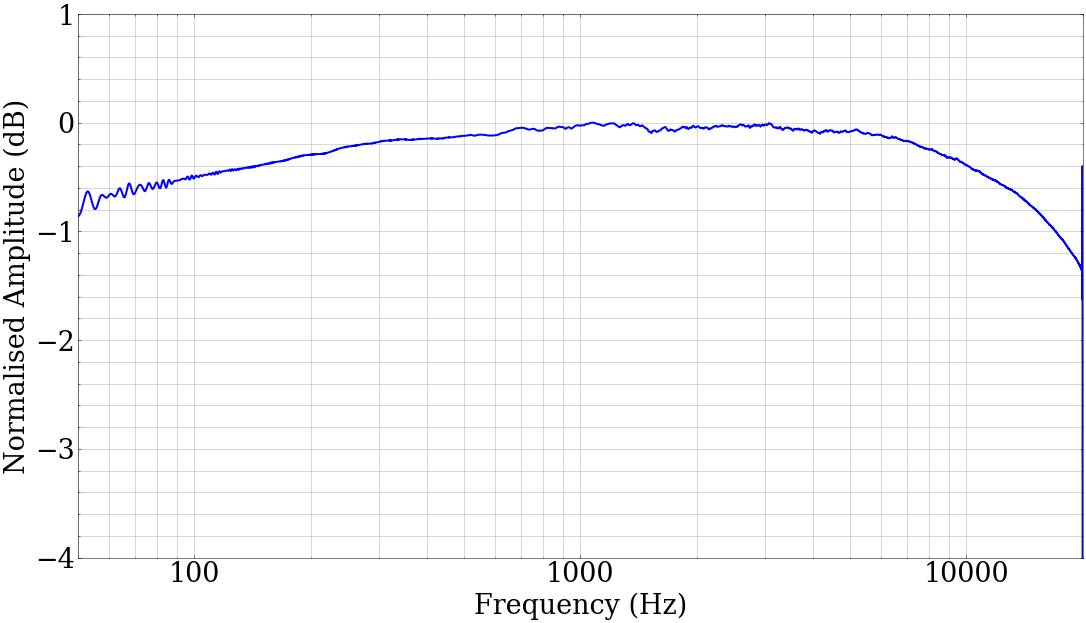

In [356]:
plot_magnitude_spectrum_one(ReampChirp, sr)

No handles with labels found to put in legend.


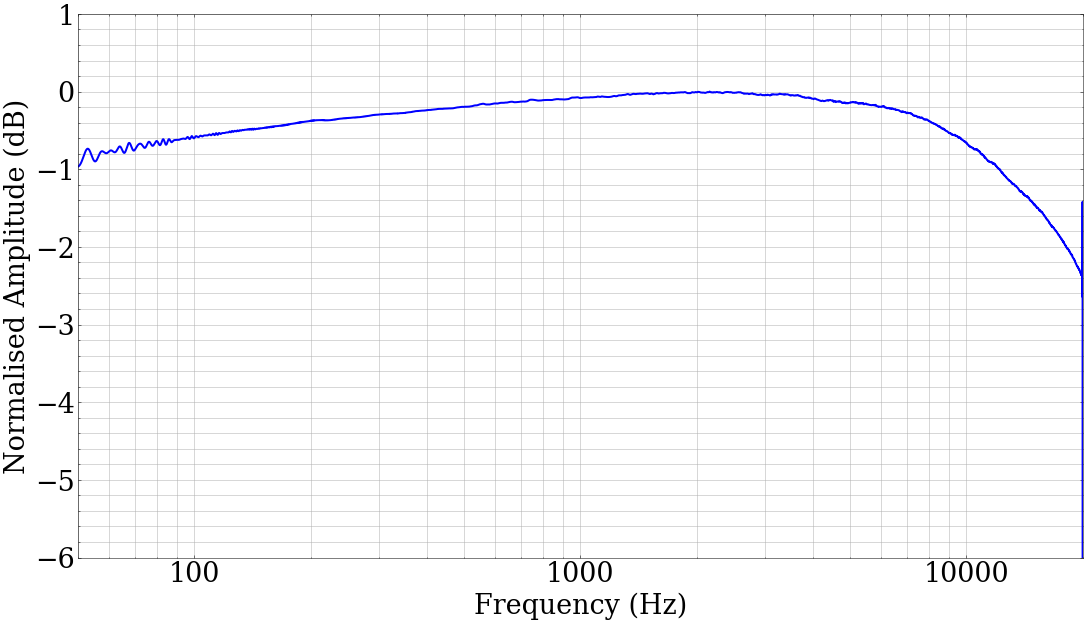

In [353]:
plot_magnitude_spectrum_one(ReampChirp100k, sr)